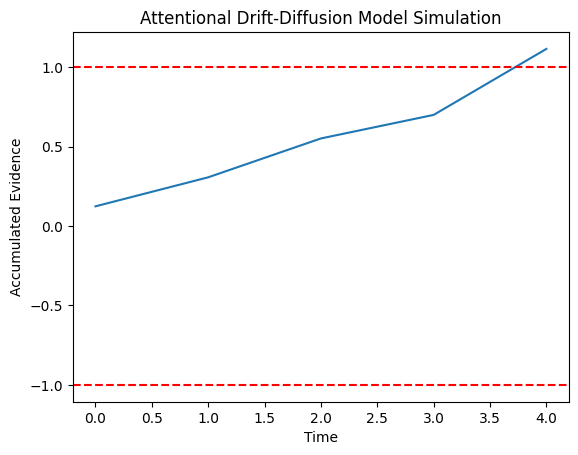

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_aDDM(drift_bias=0.1, decision_threshold=1.0, max_time=1000, dt=1, sigma=0.1):
    """
    Simulates the attentional drift-diffusion model (aDDM).

    Parameters:
    - drift_bias: Baseline drift towards one option due to attention bias.
    - decision_threshold: The evidence threshold for making a decision.
    - max_time: Maximum simulation time (in arbitrary units).
    - dt: Time step for the simulation.
    - sigma: Standard deviation of the noise component.

    Returns:
    - decision_time: The time taken to reach a decision.
    - evidence_over_time: The accumulated evidence over time.
    """
    time = 0
    evidence = 0
    evidence_over_time = []

    while time < max_time and abs(evidence) < decision_threshold:
        # Simulate attentional bias as a time-varying component. This could be replaced with
        # more complex functions to model dynamic changes in attention.
        attention_effect = drift_bias * np.cos(time * 0.01)

        # Update the evidence accumulation with both the drift (influenced by attention) and noise
        evidence += (drift_bias + attention_effect) * dt + np.random.normal(0, sigma)
        evidence_over_time.append(evidence)
        time += dt

    decision_time = time if abs(evidence) >= decision_threshold else np.nan
    return decision_time, evidence_over_time

# Simulate the model
decision_time, evidence_over_time = simulate_aDDM()

# Plot the results
plt.plot(evidence_over_time)
plt.axhline(y=1.0, color='r', linestyle='--')
plt.axhline(y=-1.0, color='r', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Accumulated Evidence')
plt.title('Attentional Drift-Diffusion Model Simulation')
plt.show()
